In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!wget https://github.com/Bt-PplusK/Resume_Screening_for_Job/blob/main/UpdatedResumeDataSet.csv

--2024-01-04 05:18:20--  https://github.com/Bt-PplusK/Resume_Screening_for_Job/blob/main/UpdatedResumeDataSet.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4513 (4.4K) [text/plain]
Saving to: ‘UpdatedResumeDataSet.csv’

UpdatedResumeDataSe 100%[===================>]   4.41K  --.-KB/s    in 0s      

2024-01-04 05:18:20 (70.4 MB/s) - ‘UpdatedResumeDataSet.csv’ saved [4513/4513]



In [2]:
df =pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.dtypes

Category    object
Resume      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df.shape

(962, 2)

#Exploring Categories

In [7]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [8]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [9]:
print("total unique category: {}". format(len(df['Category'].unique())))

total unique category: 25


In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow = True,colors =plt.cm.plasma(np.linspace(0,1,3)))

In [12]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [13]:
df['Category'][0]

'Data Science'

In [14]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

#Data Cleaning

In [15]:
import re
def cleanResume(txt):
  cleanTxt = re.sub('http\S+\s',' ',txt)
  cleanTxt = re.sub('@\S+',' ',cleanTxt)
  cleanTxt = re.sub('#\S+',' ',cleanTxt)
  cleanTxt = re.sub('RT|cc',' ',cleanTxt)
  cleanTxt = re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_{|}~"""),' ',cleanTxt)
  cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
  cleanTxt = re.sub('\s+',' ',cleanTxt)

  return cleanTxt

In [16]:
df['Resume'] = df['Resume'].apply(lambda x : cleanResume(x))

In [17]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [18]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [19]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

# Ensure stopwords corpus is downloaded
nltk.download('stopwords')

# Define stopwords with additional words
stopwords = set(stopwords.words('english') + ['``', "''"])

# Collect and process text data
total_words = []
for sentence in df['Resume'].values[:200]:  # Process only first 200 sentences
    cleaned_text = cleanResume(sentence)
    words = nltk.word_tokenize(cleaned_text)
    filtered_words = [word for word in words if word not in stopwords and word not in string.punctuation]
    total_words.extend(filtered_words)  # Extend list efficiently

# Create frequency distribution and get most common words
word_freq_dist = nltk.FreqDist(total_words)
most_common_words = word_freq_dist.most_common(100)

print(most_common_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

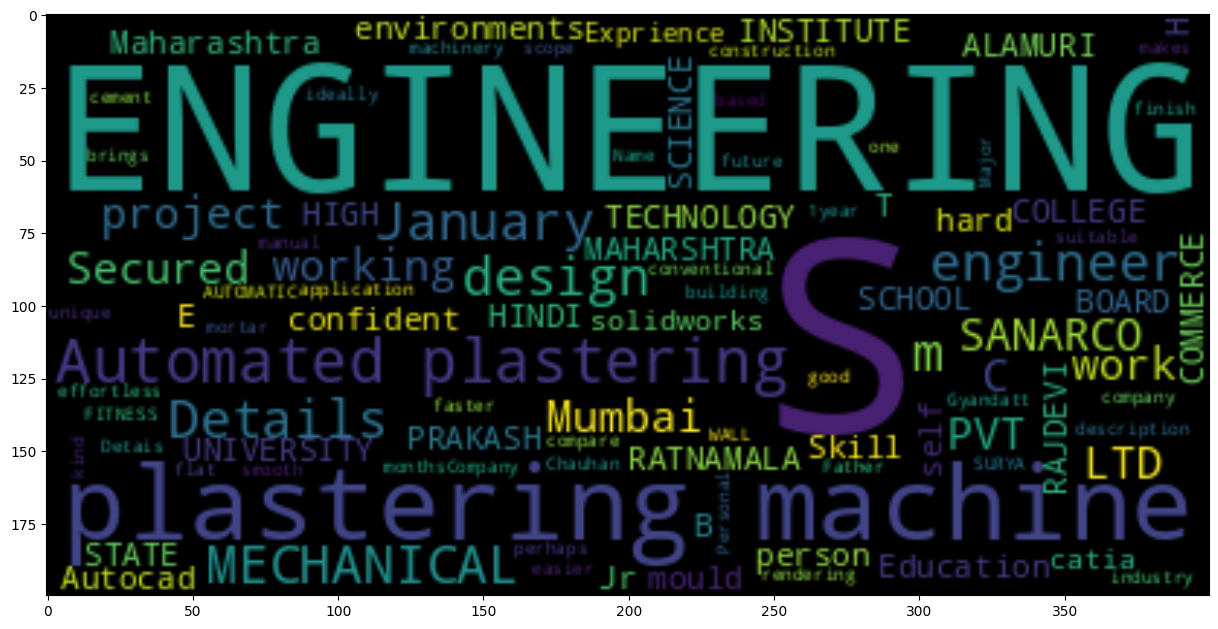

In [21]:
WC=WordCloud().generate(cleaned_text)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

#Training Machine Learning Model

In [22]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

In [23]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [24]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
X  = tfidf.transform(df['Resume'])

In [26]:
X

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(769, 7351)
(193, 7351)


# Modeling
1. KNeighborsClassifier

In [29]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [43]:
'''from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, ypred))
print("Random Forest F1-Score:", f1_score(y_test, ypred, average='weighted'))'''

Random Forest Accuracy: 0.9948186528497409
Random Forest F1-Score: 0.9948954135482634


2. Logistic Regression Classifier

In [36]:
'''from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
ypred = lr_model.predict(X_test)

# Evaluate model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, ypred))
print("Logistic Regression F1-Score:", f1_score(y_test, ypred, average='weighted'))'''

Logistic Regression Accuracy: 0.9948186528497409
Logistic Regression F1-Score: 0.9948954135482634


3. RandomForestClassifier

In [40]:
'''from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
ypred = rf_model.predict(X_test)

# Evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, ypred))
print("Random Forest F1-Score:", f1_score(y_test, ypred, average='weighted'))'''

Random Forest Accuracy: 0.9948186528497409
Random Forest F1-Score: 0.9948954135482634


In [44]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, ypred))
print("Random Forest F1-Score:", f1_score(y_test, ypred, average='weighted'))

Random Forest Accuracy: 0.9637305699481865
Random Forest F1-Score: 0.9609223354886793


In [45]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2, 15, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8, 15,  2,  9, 10,  2, 23, 20, 20, 23, 15, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
       23, 11, 15, 12,  3, 23,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11, 23, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

# Evaluation

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,ypred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 

In [47]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_test,ypred)*100,'%')
print('Precision Macro Score ',precision_score(y_test,ypred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test,ypred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_test,ypred, average = 'macro')*100,'%')

Accuracy Score 96.37305699481865 %
Precision Macro Score  98.2017543859649 %
Recall_Score 95.38095238095238 %
F1_Score 95.9047786352134 %


#Save model

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(rf_model, open('model_with_rf.pkl', 'wb'))

# Load model

In [ ]:
'''
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""
'''

'\nmyresume = """I am a data scientist specializing in machine\nlearning, deep learning, and computer vision. With\na strong background in mathematics, statistics,\nand programming, I am passionate about\nuncovering hidden patterns and insights in data.\nI have extensive experience in developing\npredictive models, implementing deep learning\nalgorithms, and designing computer vision\nsystems. My technical skills include proficiency in\nPython, Sklearn, TensorFlow, and PyTorch.\nWhat sets me apart is my ability to effectively\ncommunicate complex concepts to diverse\naudiences. I excel in translating technical insights\ninto actionable recommendations that drive\ninformed decision-making.\nIf you\'re looking for a dedicated and versatile data\nscientist to collaborate on impactful projects, I am\neager to contribute my expertise. Let\'s harness the\npower of data together to unlock new possibilities\nand shape a better future.\nContact & Sources\nEmail: 611noorsaeed@gmail.com\nPhone: 0

In [ ]:
my_resume = '/content/electrical-engineering-resume-template.pdf'

In [ ]:
import pickle

# Load the trained classifier
model = pickle.load(open('/content/model_with_rf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(my_resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = model.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: HR
12
